# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# EDA

In [2]:
data = pd.read_excel(r'C:\Users\Ardra\Desktop\DS\Assign\Classification\iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [8]:
num_cols = data[['SL', 'SW', 'PL', 'PW', 'Classification']]
num_cols.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

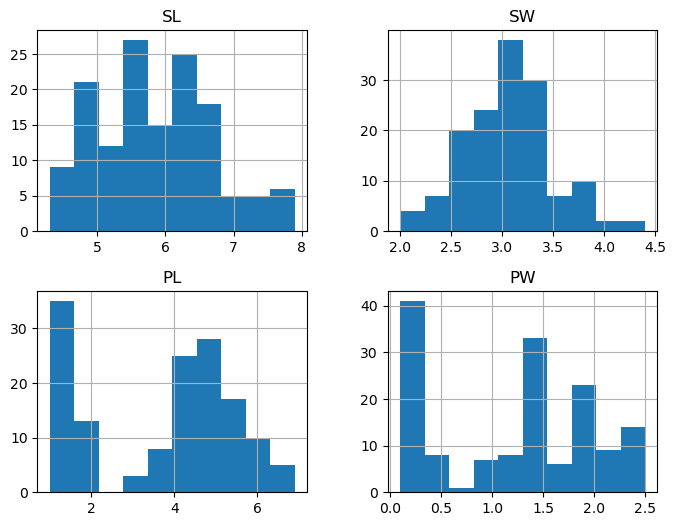

In [9]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(8,6))
plt.show

In [10]:
for col in ['SL', 'SW', 'PL']:
    data[col] = data[col].fillna(data[col].median())
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [11]:
data['Classification'].nunique()

3

## Label Encoding

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Classification']= label_encoder.fit_transform(data['Classification'])
data['Classification'].unique()

array([0, 1, 2])

In [13]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Logistic Regression

In [14]:
y =  data['Classification']
x = data.drop(['Classification'],axis=1)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.2)

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
model = clf.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,recall_score,precision_score,f1_score
Accuracy_lr = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision =",precision_score(y_test,y_pred,average='micro'))
print("Recall =",recall_score(y_test,y_pred,average='micro'))
print("f1 Score=",f1_score(y_test,y_pred,average='micro'))

Accuracy: 0.9416666666666667
Precision = 0.9416666666666667
Recall = 0.9416666666666667
f1 Score= 0.9416666666666667


In [18]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.90      0.92      0.91        39
           2       0.92      0.95      0.94        38

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



In [19]:
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))

Confusion Matrix: [[41  2  0]
 [ 0 36  3]
 [ 0  2 36]]


# KNN Classification

In [20]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [21]:
metric_k

[0.9583333333333334,
 0.9416666666666667,
 0.95,
 0.925,
 0.95,
 0.9416666666666667,
 0.9333333333333333,
 0.9083333333333333,
 0.9333333333333333,
 0.8916666666666667,
 0.9083333333333333,
 0.875]

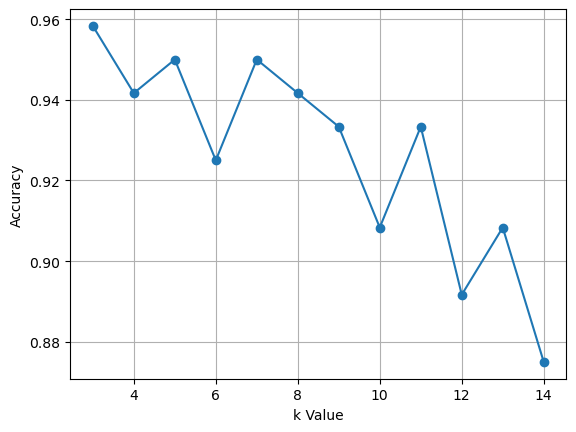

In [22]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.grid()

In [23]:
classifier = KNeighborsClassifier(n_neighbors=2,metric='minkowski',p=2)
model = classifier.fit(x_train,y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,recall_score,precision_score,f1_score
Accuracy_knn = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision =",precision_score(y_test,y_pred,average='micro'))
print("Recall =",recall_score(y_test,y_pred,average='micro'))
print("f1 Score=",f1_score(y_test,y_pred,average='micro'))

Accuracy: 0.9166666666666666
Precision = 0.9166666666666666
Recall = 0.9166666666666666
f1 Score= 0.9166666666666666


In [25]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.81      0.97      0.88        39
           2       0.97      0.82      0.89        38

    accuracy                           0.92       120
   macro avg       0.93      0.91      0.92       120
weighted avg       0.93      0.92      0.92       120



In [26]:
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))

Confusion Matrix: [[41  2  0]
 [ 0 38  1]
 [ 0  7 31]]


# Result

In [27]:
from simple_colors import *
print(red('Logistic Regression', ['bold', 'underlined']))
print(f"Accuracy of the model is {Accuracy_lr}")
print("===================================================")
print(red('KNN Classifier', ['bold', 'underlined']))
print(f"Accuracy of the model is {Accuracy_knn}")

Logistic Regression
Accuracy of the model is 0.9416666666666667
KNN Classifier
Accuracy of the model is 0.9166666666666666
